In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

*Примеры 1.1.1 - 1.1.3*

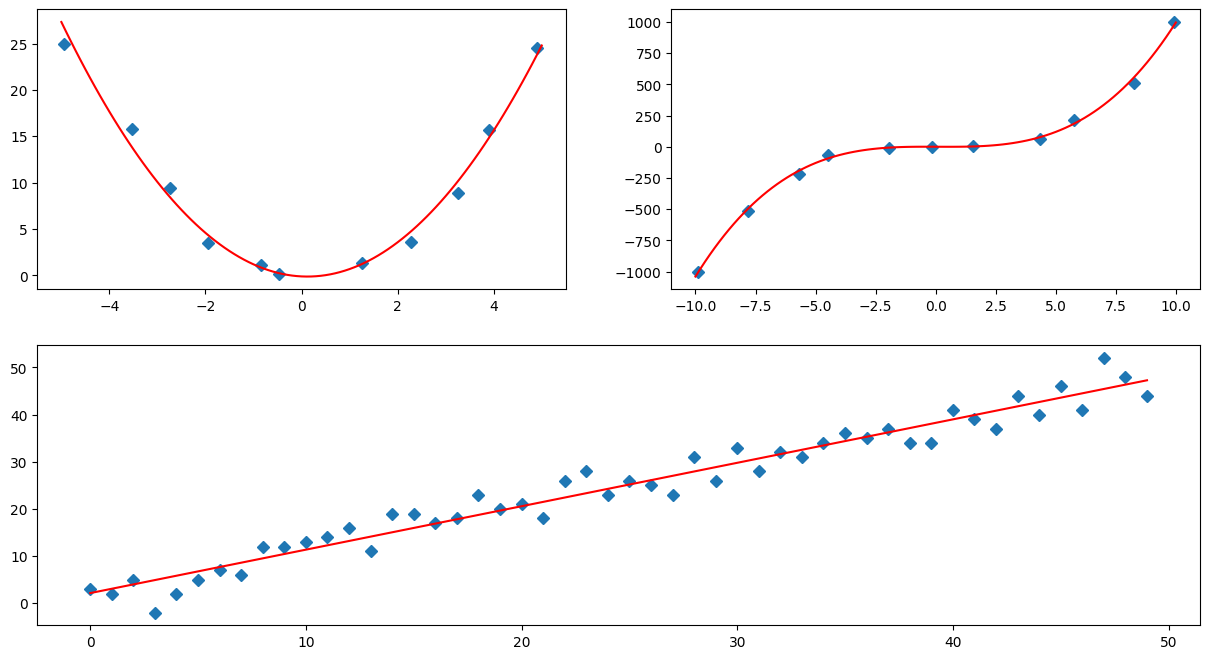

In [34]:
plt.figure(figsize=(15, 8))

x_p = np.linspace(-5, 5, 101)

#1
r = np.random.randint(-5, 6, 50)
x = np.array([i for i in range(0, 50)])
y = np.array([i + r[i] for i in range(0, 50)])

a = np.vstack([x, np.ones(len(x))]).T
k, b = np.linalg.lstsq(a, y, rcond= None)[0]

plt.subplot(212)
plt.plot(x, y, 'D')
plt.plot(x, k*x + b, 'r')

#2
x = np.linspace(-5, 5, 11)
y = x**2 + (np.random.rand(11)-0.5)
x += (np.random.rand(11)-0.5)

m = np.vstack([x**2, x, np.ones(11)]).T
a, b, c = np.linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(221)
plt.plot(x, y, 'D')
plt.plot(x_p, a * x_p**2 + b * x_p + c, 'r')

#3
x = np.linspace(-10, 10, 11)
y = x**3 + (np.random.rand(11)-0.5)
x += (np.random.rand(11)-0.5)
x_p = np.linspace(-10, 10, 101)

m = np.vstack([x**3, x**2, x, np.ones(11)]).T
a, b, c, d = np.linalg.lstsq(m, y, rcond=None)[0]

plt.subplot(222)
plt.plot(x, y, 'D')
plt.plot(x_p, a * x_p**3 + b * x_p**2 + c * x_p + d, 'r')

plt.show()

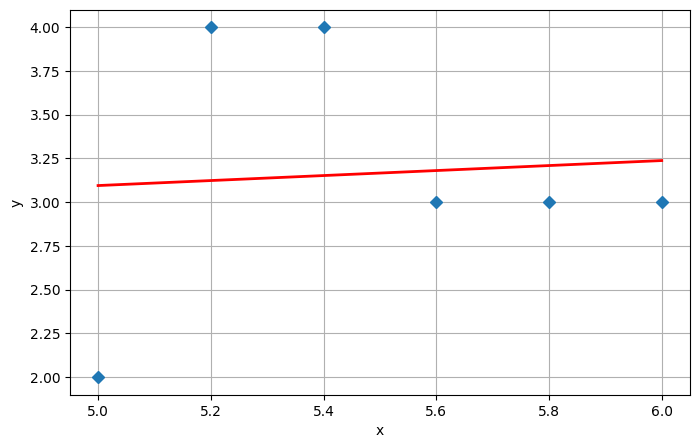

In [35]:
x = np.array([5, 5.2, 5.4, 5.6, 5.8, 6])
y = np.array([2, 4, 4, 3, 3, 3])


plt.figure(figsize=(8, 5))
plt.grid()

m = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(m, y, rcond= None)[0]

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, 'D')

plt.plot(x, a * x + b, 'r', linewidth=2)

plt.show()

**1.1**\
Представьте  собственные  данные  и  постройте  эктраполяцию  полиномами 
первой, второй и третьей степени.

In [36]:
data = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/main/credit_german.csv").sort_values(by=["duration"])
display(data.head())
x, y = np.array(data["duration"]), np.array(data["credit_amount"])

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
314,'>=200',4,'existing paid','new car',1494,'no known savings','<1',1,'male single',none,...,'real estate',29,none,own,1,'unskilled resident',2,none,no,good
734,'no checking',4,'critical/other existing credit','new car',3380,'<100','4<=X<7',1,'female div/dep/mar',none,...,'real estate',37,none,own,1,skilled,2,none,yes,good
527,'no checking',4,'critical/other existing credit',radio/tv,1503,'<100','4<=X<7',2,'male single',none,...,'real estate',42,none,own,2,'unskilled resident',2,none,yes,good
943,'no checking',4,'critical/other existing credit','new car',1455,'<100','4<=X<7',2,'male single',none,...,'real estate',42,none,own,3,'unskilled resident',2,none,yes,good
837,'no checking',4,'existing paid',furniture/equipment,601,'<100','<1',1,'female div/dep/mar',none,...,'real estate',23,none,rent,1,'unskilled resident',2,none,yes,good


In [40]:
from scipy.optimize import curve_fit
import math as m

k, x_data, beta = 0.05, np.linspace(0, 5, 50), (0.25, 0.75, 0.5)

f = lambda x, b0, b1, b2 : b0 + b1 * np.exp(-b2 * x**2)


In [41]:
y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

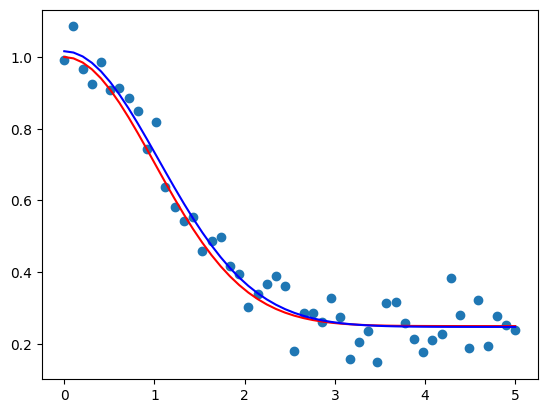

In [42]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [43]:
beta = (0.25, 0.75)

f = lambda x, b0, b1: b0 + b1 * x

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

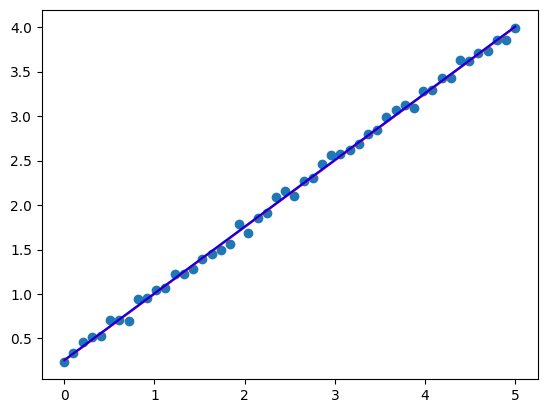

In [44]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [45]:
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)


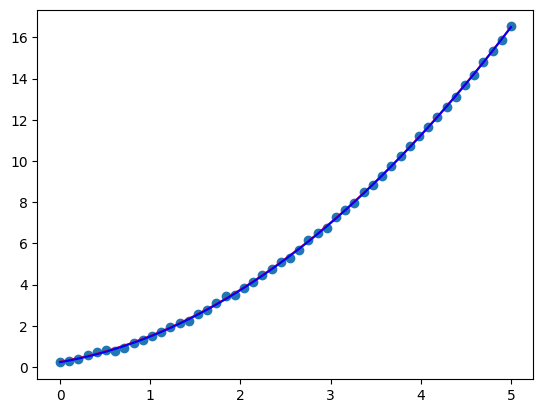

In [46]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [47]:
beta = (0.25, 0.75)
x_data = np.linspace(0.1, 5, 50)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

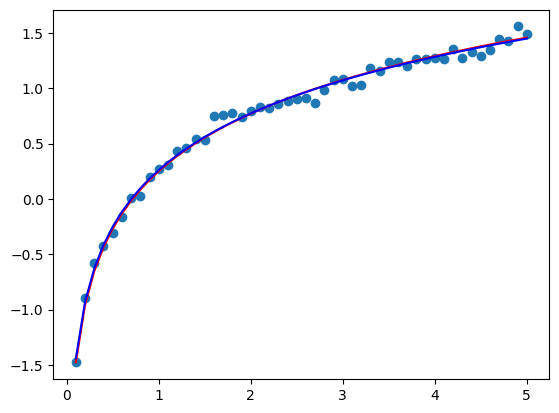

In [48]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [49]:
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x**b1

y = f(x_data, *beta)
y_data = y + k * np.random.randn(len(x_data))

beta_opt, beta_cov = curve_fit(f, x_data, y_data)

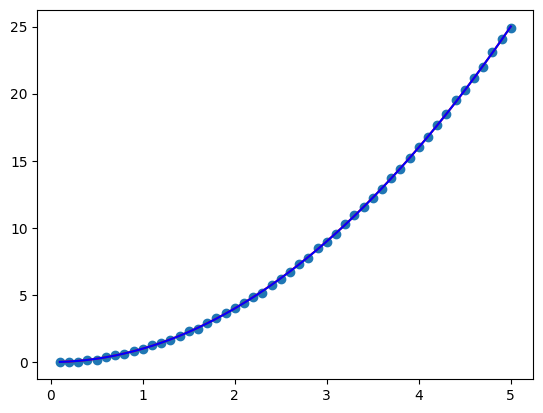

In [50]:
plt.scatter(x_data, y_data)
plt.plot(x_data, y, 'r')
plt.plot(x_data, f(x_data, *beta_opt), 'b')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
a = np.linspace(10, 100, 20)
a = a + np.random.randint(-10, 10, 20)
a

array([  1.        ,  15.73684211,  15.47368421,  15.21052632,
        19.94736842,  31.68421053,  33.42105263,  37.15789474,
        55.89473684,  54.63157895,  63.36842105,  54.10526316,
        64.84210526,  62.57894737,  71.31578947,  84.05263158,
        77.78947368,  93.52631579,  87.26315789, 104.        ])

In [52]:
d = {
    "Учебное время": np.linspace(0.5, 5.5, 20),
    "Оценка": a
}
dataSet = pd.DataFrame(d)
dataSet.head()

,Учебное время,Оценка
0,0.500000,1.000000
1,0.763158,15.736842
2,1.026316,15.473684
3,1.289474,15.210526
4,1.552632,19.947368


In [53]:
print(dataSet.shape)
dataSet.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,3.000000,52.150000
std,1.556863,29.716968
min,0.500000,1.000000
25%,1.750000,28.750000
50%,3.000000,55.263158
75%,4.250000,72.934211
max,5.500000,104.000000


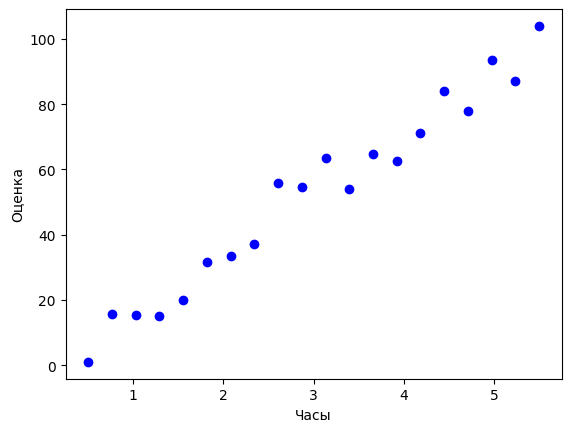

In [54]:
plt.scatter(dataSet["Учебное время"], dataSet["Оценка"], color = 'b', label = "Данные экзаамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [55]:
x = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, 1].values
print(x, '\n', y)

[[0.5       ]
 [0.76315789]
 [1.02631579]
 [1.28947368]
 [1.55263158]
 [1.81578947]
 [2.07894737]
 [2.34210526]
 [2.60526316]
 [2.86842105]
 [3.13157895]
 [3.39473684]
 [3.65789474]
 [3.92105263]
 [4.18421053]
 [4.44736842]
 [4.71052632]
 [4.97368421]
 [5.23684211]
 [5.5       ]] 
 [  1.          15.73684211  15.47368421  15.21052632  19.94736842
  31.68421053  33.42105263  37.15789474  55.89473684  54.63157895
  63.36842105  54.10526316  64.84210526  62.57894737  71.31578947
  84.05263158  77.78947368  93.52631579  87.26315789 104.        ]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_, '\n', regressor.coef_)

-6.78254716981133 
 [19.36226415]


In [57]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
df

,Actual,Predicted
0,87.263158,94.614573
1,15.736842,7.993918
2,104.000000,99.709906
3,55.894737,43.661246


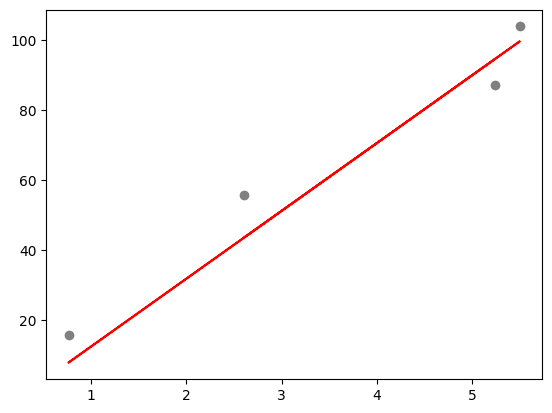

In [58]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, 'r')
plt.show()

In [59]:
dataSet = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")
dataSet.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


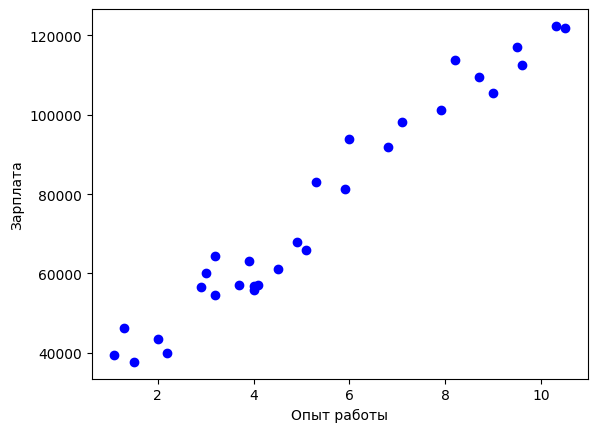

In [60]:
plt.scatter(dataSet["YearsExperience"], dataSet["Salary"], color = 'b', label = "Данные экзаамена")
plt.xlabel("Опыт работы")
plt.ylabel("Зарплата")
plt.show()

In [61]:
x = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, 1].values
print(x, '\n', y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] 
 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

print(regressor.intercept_, '\n', regressor.coef_)

26780.09915062818 
 [9312.57512673]


In [63]:
y_pred = regressor.predict(x_test)

df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


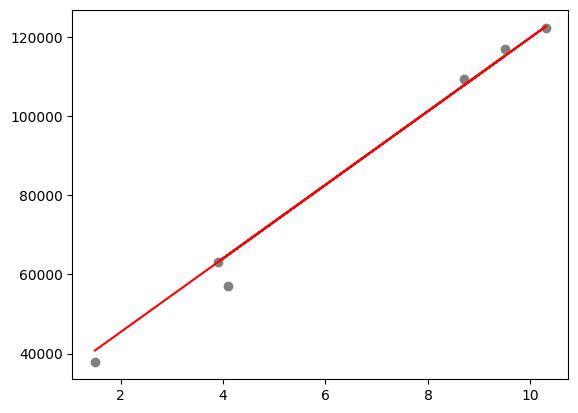

In [64]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, 'r')
plt.show()

In [65]:
y = np.random.randint(1, 6 + 1, 20)
x = np.random.randint(1, 6 + 1, (3, 20))
x = x.T
x = np.c_[x, np.ones(x.shape[0])]
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[-0.34941444  0.29630922 -0.13029036  3.67383138]


In [66]:
from sklearn import metrics

In [67]:
y = np.random.randint(1, 6 + 1, 20)
x = np.random.randint(1, 6 + 1, (3, 20))

new_y = np.array(y).T
df1 = pd.DataFrame(new_y)

new_x = np.array(x).T
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]

dataset = pd.concat([df1, df2], axis=1, join='inner')
display(dataset.head())
print(dataset.shape)
display(dataset.describe())

,y,x1,x2,x3
0,1,6,3,1
1,2,2,1,2
2,3,1,4,3
3,3,3,1,6
4,2,6,3,2


(20, 4)


,y,x1,x2,x3
count,20.000000,20.00000,20.000000,20.000000
mean,3.250000,3.90000,3.350000,3.050000
std,1.650359,2.04939,1.496487,1.761429
min,1.000000,1.00000,1.000000,1.000000
25%,2.000000,2.00000,2.750000,2.000000
50%,3.000000,4.00000,3.000000,2.500000
75%,4.250000,6.00000,4.000000,4.250000
max,6.000000,6.00000,6.000000,6.000000


In [68]:
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
display(coeff_df)

y_pred = regressor.predict(x_test)
df = pd.DataFrame(
    {
        'Actual': y_test, 
        'Predicted': y_pred
    })
display(df)

,Coefficient
x1,0.083332
x2,-0.114452
x3,0.246698


,Actual,Predicted
18,1,3.718038
1,2,3.154637
19,6,2.700128
8,3,3.487965


In [69]:
print(
    'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)
)


Mean Squared Error: 4.9620451172277384


In [70]:
data = pd.read_csv("https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv")

x = data[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient']) 
display(coeff_df)

y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
display(df)

print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))


,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


Mean Squared Error: 4666.344787588368


Вариант 10
x =  [0.  0.2 0.4 0.6 0.8 1. ]
y =  [4.28571429 4.17142857 4.05714286 3.94285714 3.82857143 3.71428571]


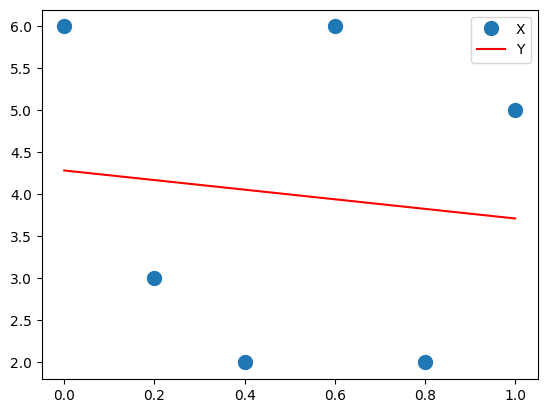

x =  [0.  0.2 0.4 0.6 0.8 1. ]
y =  [22.         10.08571429  3.95714286  3.61428571  9.05714286 20.28571429]


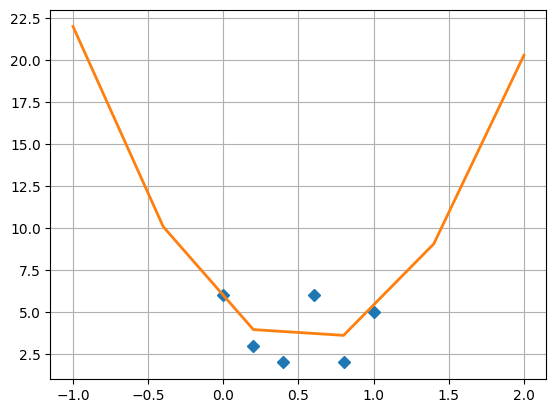

In [71]:
print('Вариант 10')

x = np.linspace(0, 1, 6)
y = np.array([6, 3, 2, 6, 2, 5])

A = np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(A, y, rcond = None)[0]

print('x = ', x)
print('y = ', m*x +c)

plt.plot(x, y, 'o', label='X', markersize=10)
plt.plot(x, m * x + c, 'r', label='Y')
plt.legend()
plt.show()

m = np.vstack((x**2, x, np.ones(6))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-1, 2, 6)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()

print('x = ', x)
print('y = ', s[0]*x_prec**2+s[1]*x_prec+s[2])